In [1]:
# this code is generated by the Domino Code Assist toolbar button
import domino_code_assist as dca
dca.init()

Cannot show ipywidgets in text

In [2]:
import pandas as pd

df = pd.read_csv("/mnt/data/data.csv")
df

,HDF,datetime,NPSHYD,OTHER,INTNED,INTIRL
0,FUELHH,2022-09-01 00:00:00,92,184.0,0,4
1,FUELHH,2022-09-01 00:30:00,92,167.0,0,0
2,FUELHH,2022-09-01 01:00:00,92,148.0,0,0
3,FUELHH,2022-09-01 01:15:00,92,NaN,0,0
4,FUELHH,2022-09-01 01:18:00,92,NaN,0,0
...,...,...,...,...,...,...
10425,FUELHH,2023-04-06 04:00:00,134,192.0,206,0
10426,FUELHH,2023-04-06 04:30:00,134,188.0,214,0
10427,FUELHH,2023-04-06 05:00:00,172,142.0,222,72
10428,FUELHH,2023-04-06 05:30:00,209,136.0,214,146


In [3]:
df = df.loc[df["OTHER"].notna()]
df = df.loc[df["NPSHYD"].notna()]
df

,HDF,datetime,NPSHYD,OTHER,INTNED,INTIRL
0,FUELHH,2022-09-01 00:00:00,92,184.0,0,4
1,FUELHH,2022-09-01 00:30:00,92,167.0,0,0
2,FUELHH,2022-09-01 01:00:00,92,148.0,0,0
5,FUELHH,2022-09-01 01:30:00,92,145.0,0,14
6,FUELHH,2022-09-01 02:00:00,91,141.0,0,52
...,...,...,...,...,...,...
10425,FUELHH,2023-04-06 04:00:00,134,192.0,206,0
10426,FUELHH,2023-04-06 04:30:00,134,188.0,214,0
10427,FUELHH,2023-04-06 05:00:00,172,142.0,222,72
10428,FUELHH,2023-04-06 05:30:00,209,136.0,214,146


In [4]:
from solara.express import CrossFilteredFigurePlotly
import plotly.express as px

_base_var_1 = px.area(df, x="datetime", y="NPSHYD")
_base_var_1.update_layout(margin=dict(l=0, r=0, t=40 if _base_var_1.layout.title.text else 20, b=0))
var_1 = CrossFilteredFigurePlotly(_base_var_1)

var_1

Cannot show ipywidgets in text

In [5]:
df = df.dropna(axis=0, how='any')
df

,HDF,datetime,NPSHYD,OTHER,INTNED,INTIRL
0,FUELHH,2022-09-01 00:00:00,92,184.0,0,4
1,FUELHH,2022-09-01 00:30:00,92,167.0,0,0
2,FUELHH,2022-09-01 01:00:00,92,148.0,0,0
5,FUELHH,2022-09-01 01:30:00,92,145.0,0,14
6,FUELHH,2022-09-01 02:00:00,91,141.0,0,52
...,...,...,...,...,...,...
10425,FUELHH,2023-04-06 04:00:00,134,192.0,206,0
10426,FUELHH,2023-04-06 04:30:00,134,188.0,214,0
10427,FUELHH,2023-04-06 05:00:00,172,142.0,222,72
10428,FUELHH,2023-04-06 05:30:00,209,136.0,214,146


In [6]:
# Using Prophet to predict future demand of our fuel type.
# Prepare the data formatting for use, with the fuel_type = list(df.columns)[2] to pick the fuel type automatically
fuel_type = list(df.columns)[2]
fuel_type
df_for_prophet = df[['datetime', fuel_type]].rename(columns = {'datetime':'ds', fuel_type:'y'})
df_for_prophet['ds'] = pd.to_datetime(df['datetime'])

# Create our training and testing sets from the data
X = df_for_prophet.copy()
y = df_for_prophet['y']
proportion_in_training = 0.8
split_index = int(proportion_in_training*len(y))
X_train, y_train = X.iloc[:split_index], y.iloc[:split_index]
X_test, y_test = X.iloc[split_index:], y.iloc[split_index:]

# import Prophet and train our model!
from fbprophet import Prophet
m = Prophet()
m.fit(X_train)

# save our model file
import pickle
with open("model.pkl", "wb") as f:
      pickle.dump(m, f)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -195.112
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12868.7     0.0927491       725.741           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13059.4    0.00113616       165.441           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       13082.8    0.00243613       167.419           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       13105.9     0.0236184       385.997           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     428         13115    0.00024912       202.422   2.122e-06       0.001      535  LS failed, Hessian reset 
     499       13122.6    0.00753156    

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<Figure size 640x480 with 0 Axes>

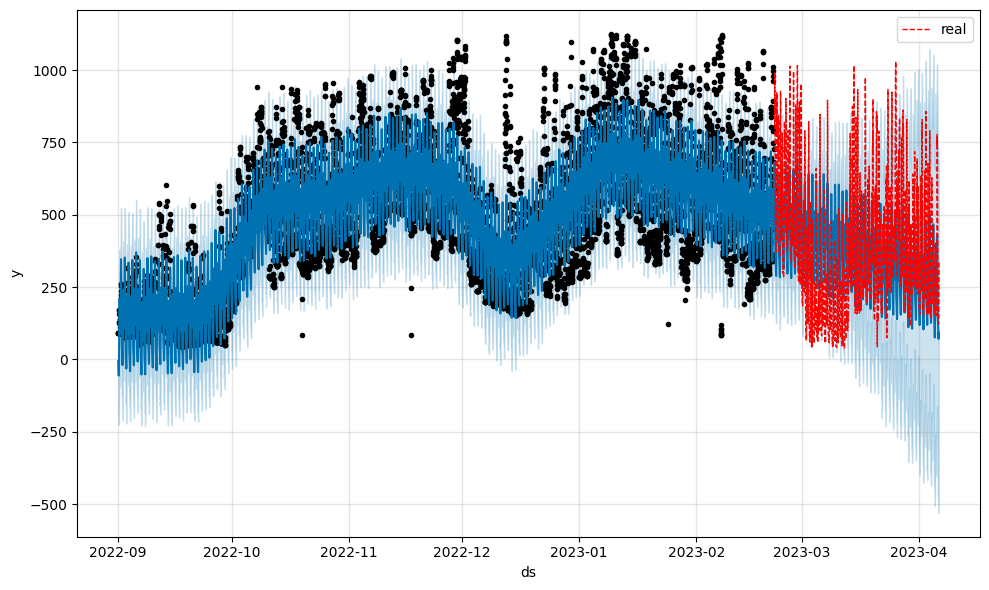

In [7]:
#Once we have trained the model we can use it to predict future energy production needs:
future = m.make_future_dataframe(periods=int(len(y_test)/2), freq='H')
forecast = m.predict(future)

#And create a visualisation of it:
import matplotlib.pyplot as plt
plt.gcf()
fig = m.plot(forecast)
plt.plot(X_test['ds'].dt.to_pydatetime(), X_test['y'], 'r', linewidth = 1, linestyle = '--', label = 'real')
plt.legend()

In [9]:
## DCA edit snippet: /mnt/snippets/cross_validation.py
# Do Some Cross Validation and report the results back to a central database
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from domino.data_sources import DataSourceClient
import os

# Prophet cross validation
df_cv = cross_validation(m, initial='45 days', horizon='45 days')
df_p = performance_metrics(df_cv, rolling_window=1)

# Write the output to Snowflake
ds = DataSourceClient().get_datasource("Snowflake")
sql = "INSERT INTO hybridworkshop (NAME, LOCATION, PROJECT, TYPE, FUEL, MAE, RMSE) VALUES ('{}', '{}', '{}', 'Workspace', '{}', '{}', '{}');".format(os.environ.get("DOMINO_STARTING_USERNAME"),os.environ.get("DOMINO_HARDWARE_TIER_ID"),os.environ.get("DOMINO_PROJECT_NAME"),fuel_type,round(df_p['mae'][0], 3),round(df_p['rmse'][0], 3))
ds.query(sql)

# Lastly, print the performance metric results out
print("Performance Metrics:")
print(df_p)

INFO:fbprophet:Making 4 forecasts with cutoffs between 2022-11-01 05:30:00 and 2023-01-07 17:30:00


  0%|          | 0/4 [00:00<?, ?it/s]

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -49.2252
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5241.82     0.0142336       296.429      0.3608      0.3608      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5263.49     0.0134756       122.298      0.4341      0.9857      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     275       5275.41   0.000262999       115.477   1.229e-06       0.001      405  LS failed, Hessian reset 
     299       5276.64   0.000666601       70.8423      0.4744      0.4744      435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       5276.99   0.000422926       136.293   4.635e-06       0.001      494  LS failed, Hessian reset 
     382        5277.1   1.50998e-05       68.3462   2.772e-07       0.001      629  LS failed, Hessian rese

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -52.1005
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6872.77    0.00296326       247.386      0.7257      0.7257      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6909.85     0.0686408       148.955           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6927.44     0.0705667       200.426           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330       6933.18    0.00178106       136.815   1.246e-05       0.001      438  LS failed, Hessian reset 
     389       6939.24     0.0002152       114.802   1.074e-06       0.001      566  LS failed, Hessian reset 
     399       6939.88    0.00079831       66.8792           1           1      579   
    Iter      log pro

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -278.694
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8321.93     0.0365012       527.596           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        8359.4     0.0139498       273.298           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8372.73      0.118199       824.916           1           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        8381.7    0.00299878       163.979           1           1      493   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     438        8386.1   0.000318138       205.204   1.583e-06       0.001      589  LS failed, Hessian reset 
     499       8392.59    0.00101663    

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -151.719
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9859.18     0.0097257       862.613      0.3223      0.3223      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9957.74    0.00202259       239.139           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9986.31    0.00806869       204.637           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       10010.6     0.0116193       337.715           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499         10032    0.00126942       113.569           1           1      599   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/ubuntu/.local/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Performance Metrics:
  horizon            mse       rmse         mae      mape     mdape  coverage
0 45 days  222109.890138  471.28536  377.547307  0.855442  0.699999  0.508912
